### **Predicting House Prices with Linear Regression**

Name: Vignesh.M

Domain: Data Analytics

Oasis Infobyte Virtual Internship Program

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('/content/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Exploratory Data Analysis (EDA)**

**Distribution of Numerical Features**

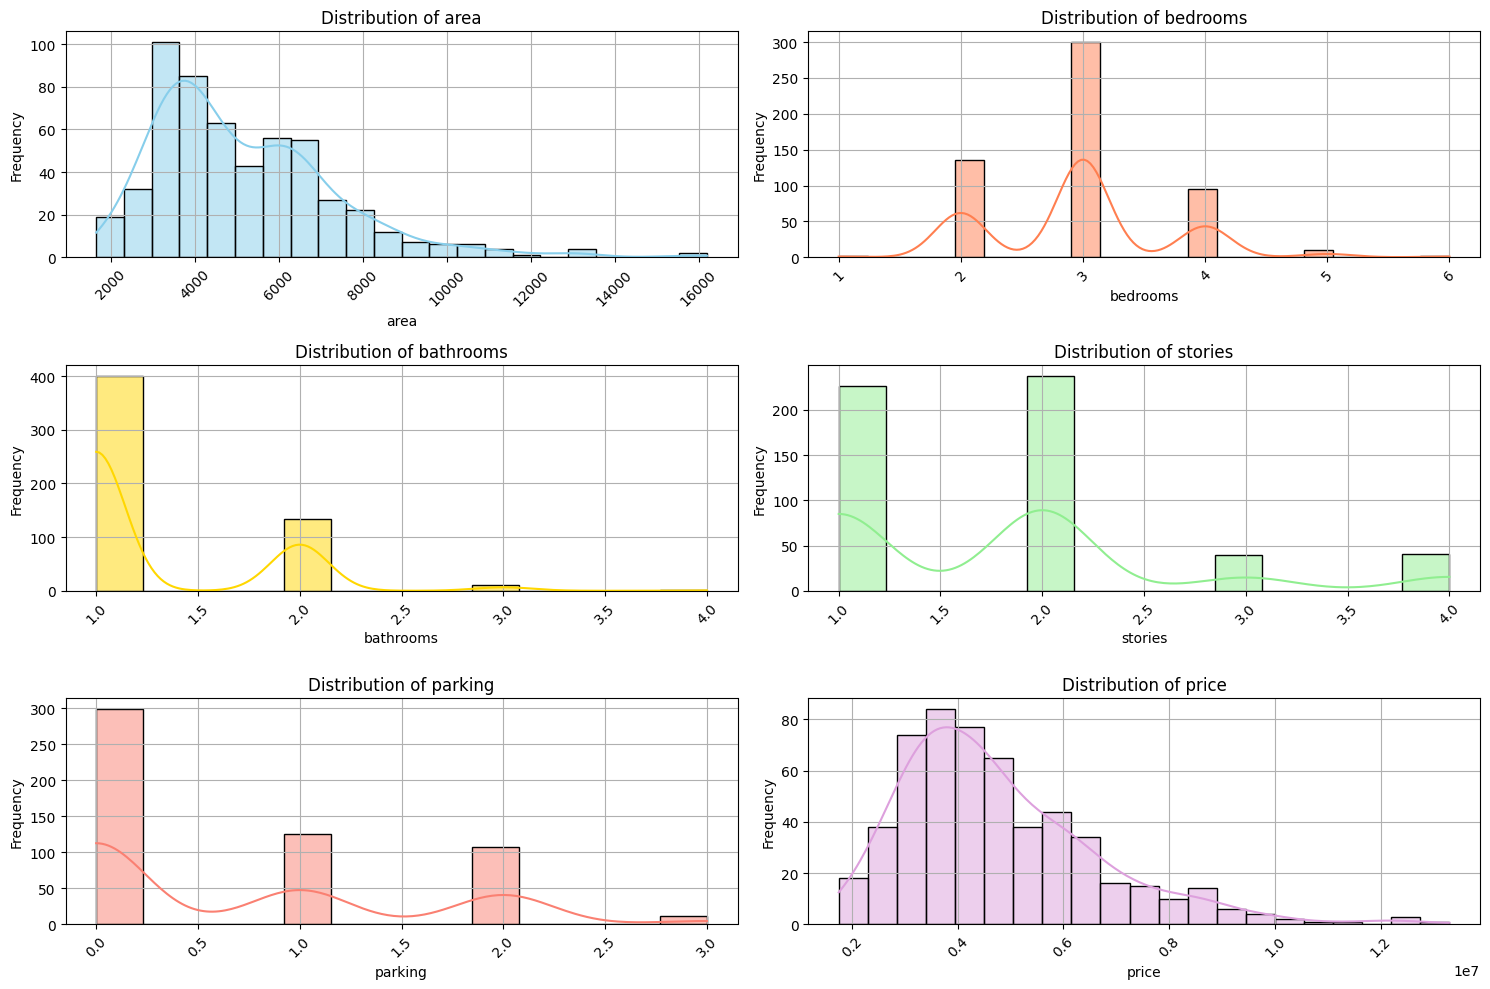

In [10]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

#Distribution of numerical features
plt.figure(figsize=(15, 10))

colors = ['skyblue','coral','gold','lightgreen','salmon','plum']

for i, variable in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[variable], kde=True, color=colors[i])
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Pairplot**

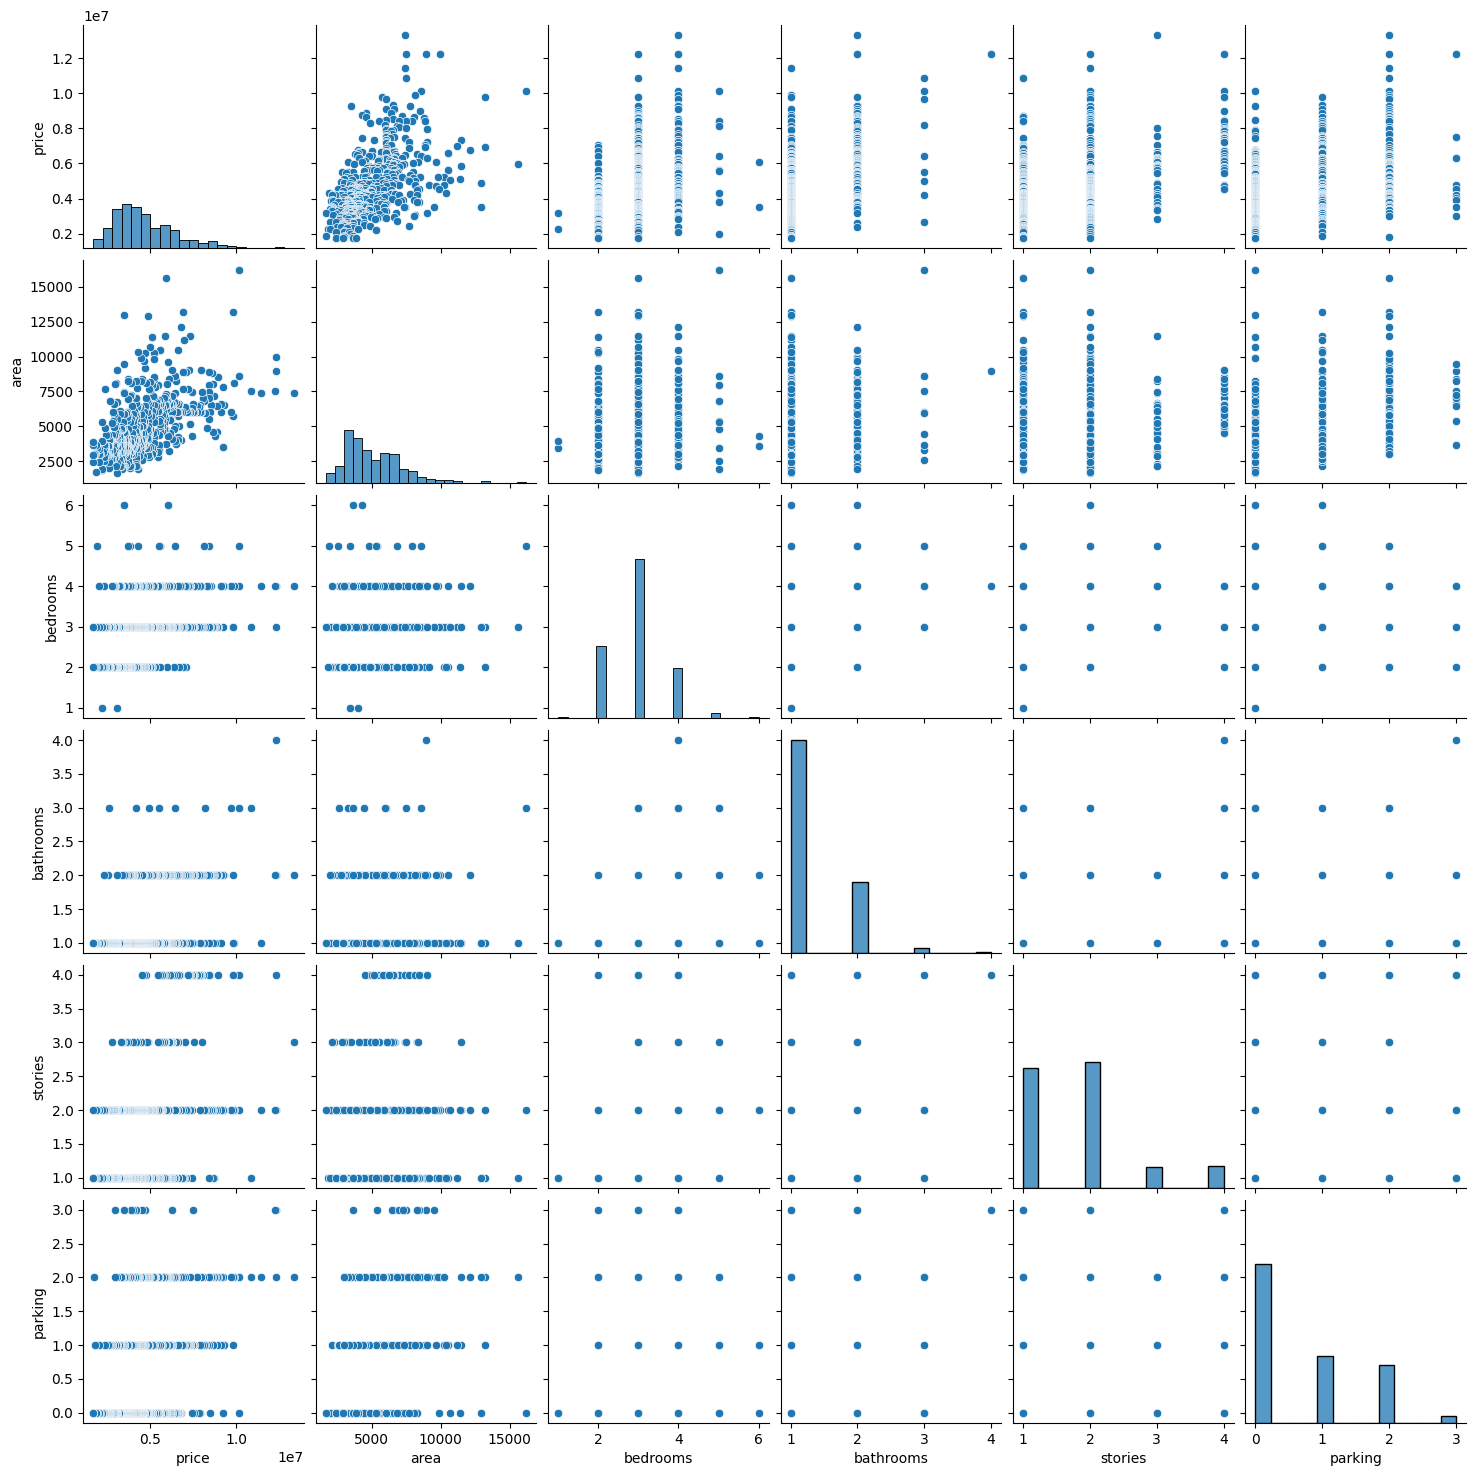

In [11]:
# Pairplot

sns.pairplot(df)
plt.show()

**Correlation Heatmap**

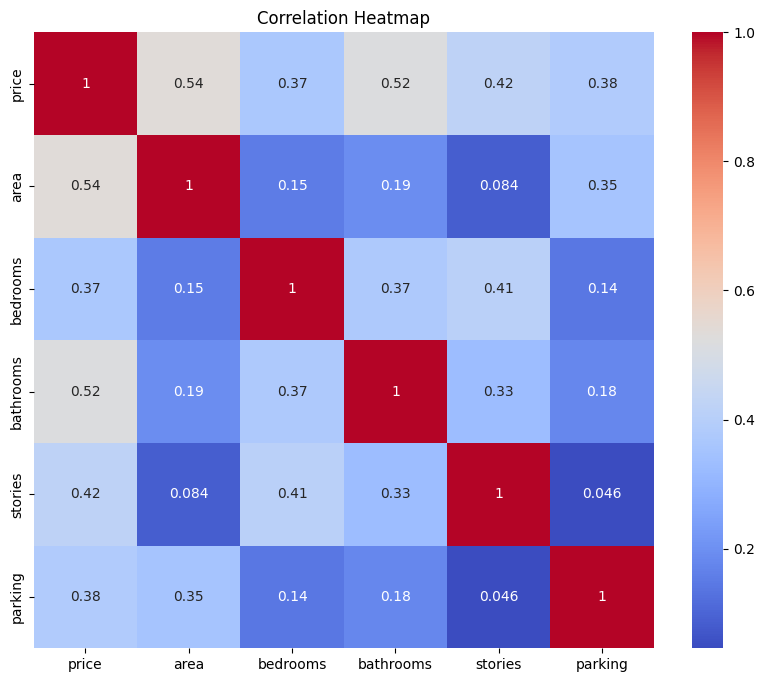

In [12]:
#Correlation heatmap of numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Box plots**

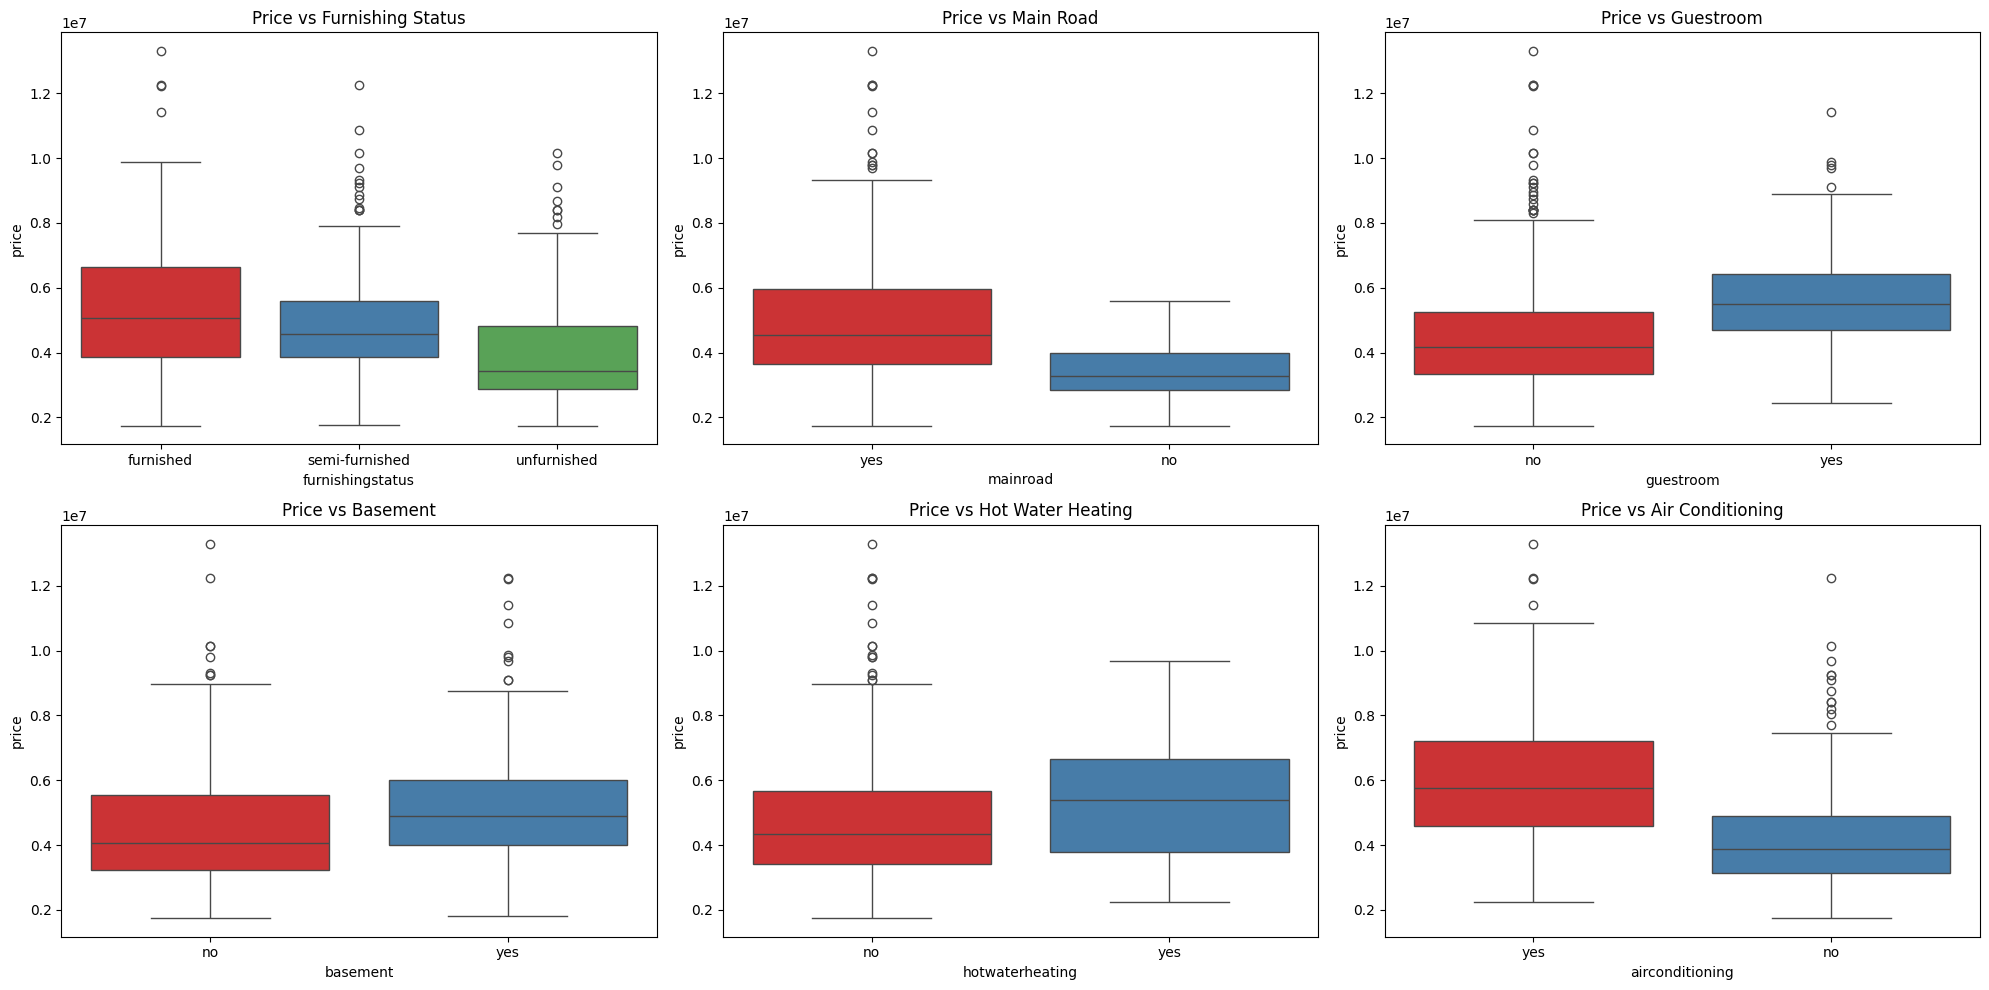

In [13]:
#Boxplot of categorical features

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='furnishingstatus', y='price', data=df, palette='Set1')
plt.title('Price vs Furnishing Status')

plt.subplot(2, 3, 2)
sns.boxplot(x='mainroad', y='price', data=df, palette='Set1')
plt.title('Price vs Main Road')

plt.subplot(2, 3, 3)
sns.boxplot(x='guestroom', y='price', data=df, palette='Set1')
plt.title('Price vs Guestroom')

plt.subplot(2, 3, 4)
sns.boxplot(x='basement', y='price', data=df, palette='Set1')
plt.title('Price vs Basement')

plt.subplot(2, 3, 5)
sns.boxplot(x='hotwaterheating', y='price', data=df, palette='Set1')
plt.title('Price vs Hot Water Heating')

plt.subplot(2, 3, 6)
sns.boxplot(x='airconditioning', y='price', data=df, palette='Set1')
plt.title('Price vs Air Conditioning')


plt.tight_layout()
plt.show()


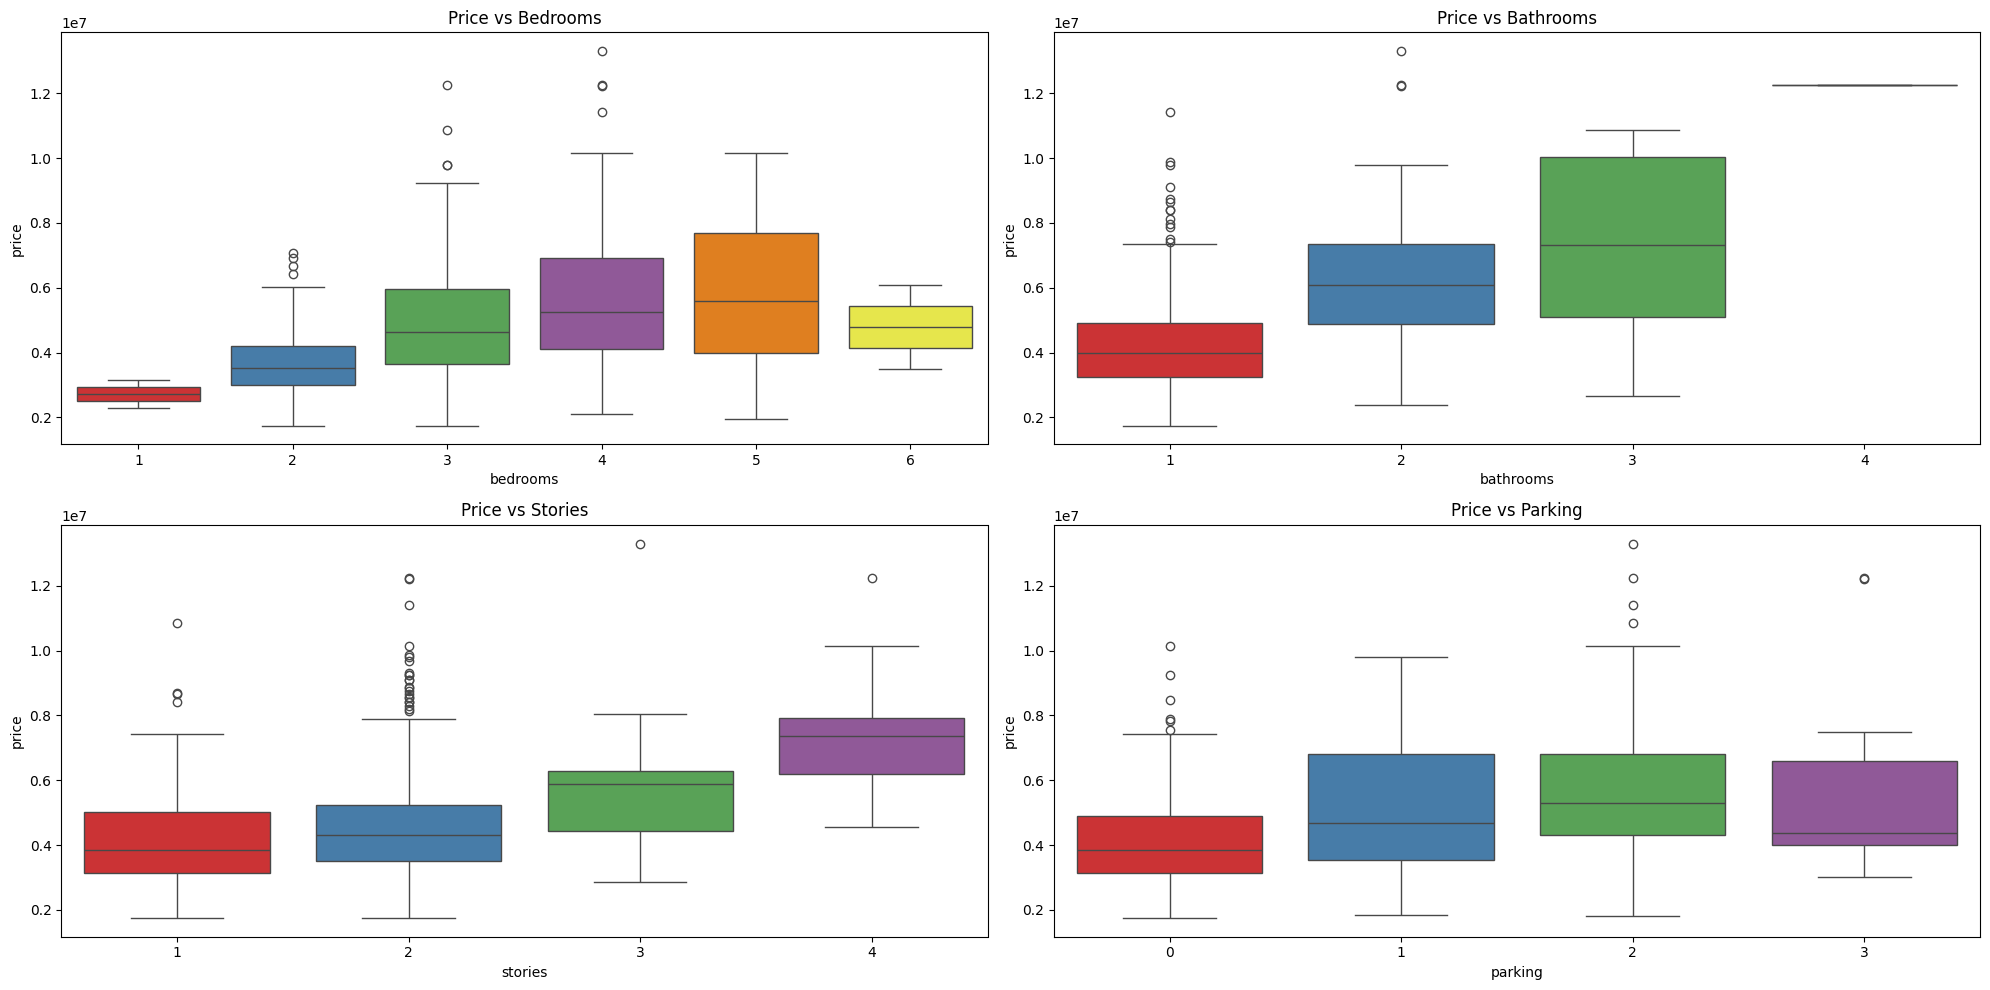

In [14]:
#Boxplot of numerical features

plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set1')
plt.title('Price vs Bedrooms')

plt.subplot(2,2,2)
sns.boxplot(x='bathrooms', y='price', data=df, palette='Set1')
plt.title('Price vs Bathrooms')

plt.subplot(2,2,3)
sns.boxplot(x='stories', y='price', data=df, palette='Set1')
plt.title('Price vs Stories')

plt.subplot(2,2,4)
sns.boxplot(x='parking', y='price', data=df, palette='Set1')
plt.title('Price vs Parking')

plt.tight_layout()
plt.show()

**Replots**

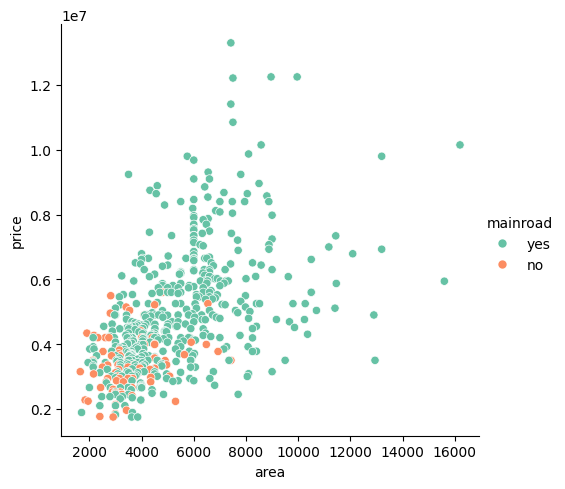

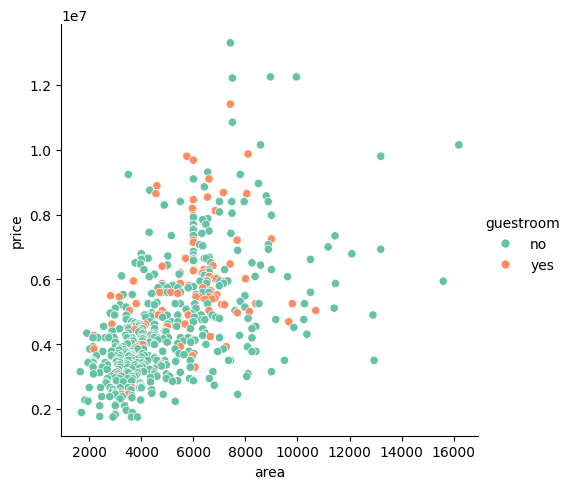

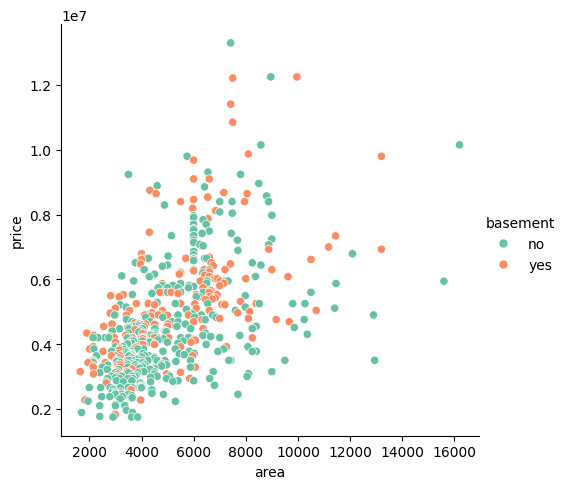

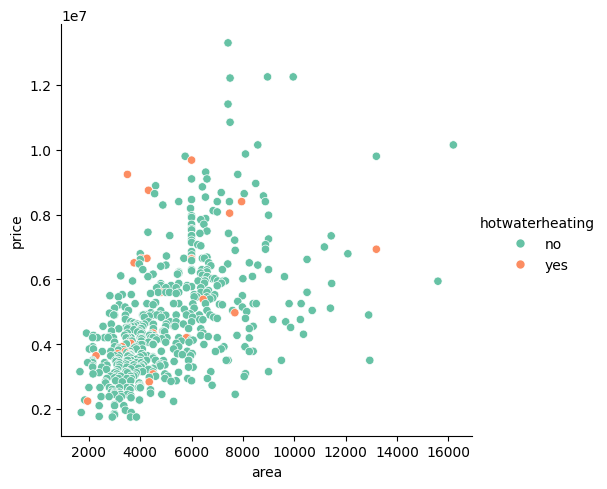

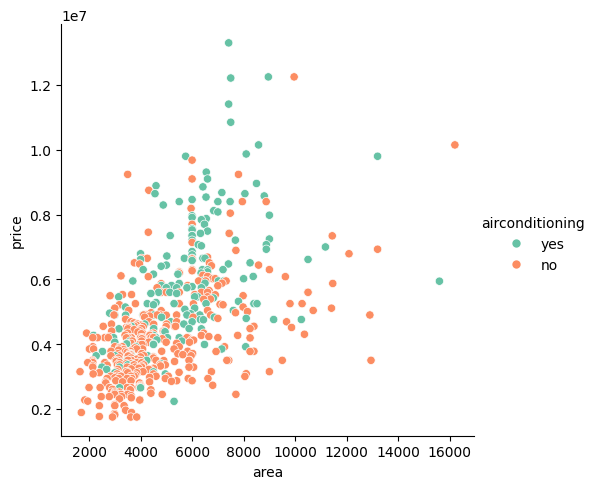

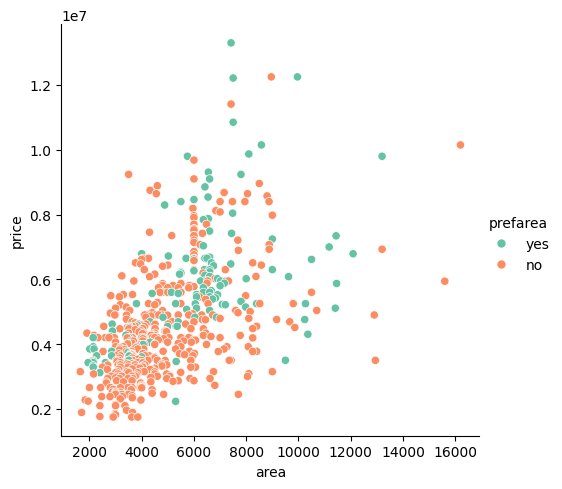

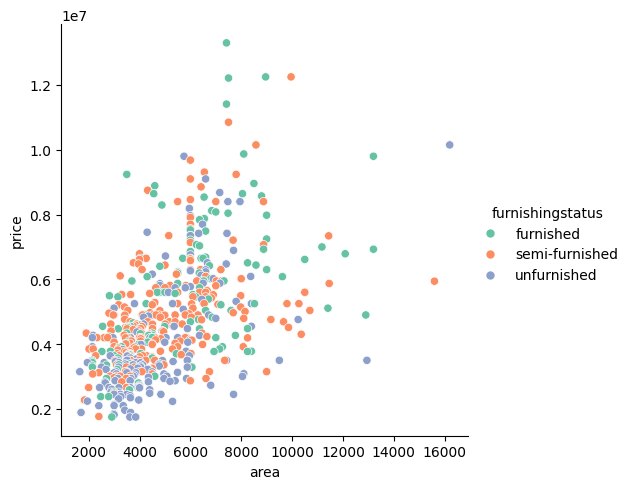

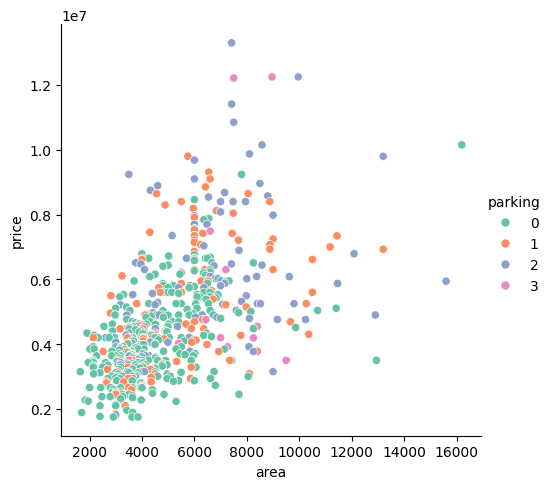

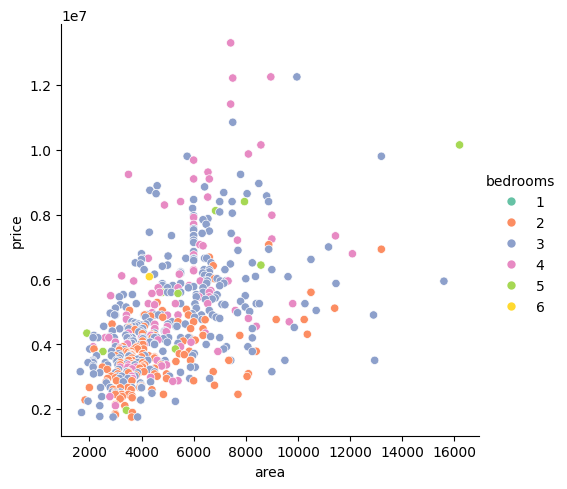

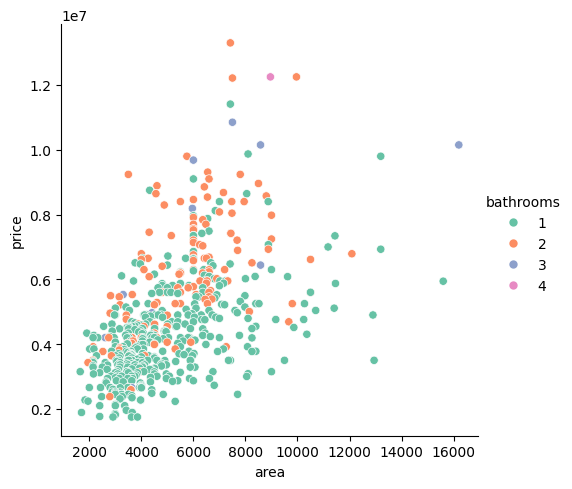

In [15]:
#Replot

sns.relplot(x='area',y='price',hue='mainroad',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='guestroom',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='basement',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='hotwaterheating',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='airconditioning',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='prefarea',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='furnishingstatus',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='parking',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='bedrooms',data=df,palette='Set2')

sns.relplot(x='area',y='price',hue='bathrooms',data=df,palette='Set2')

**Count Plots**

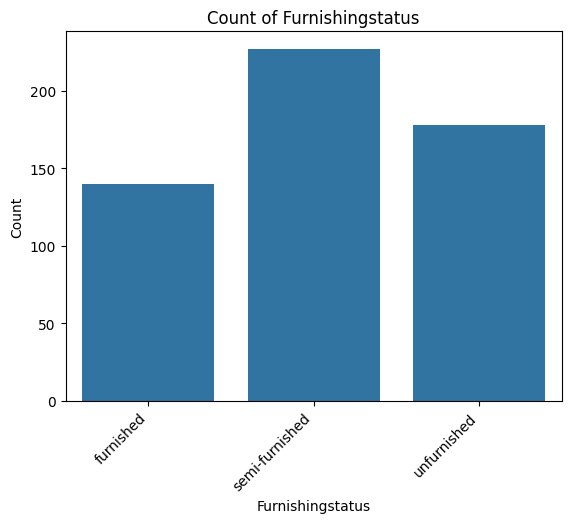

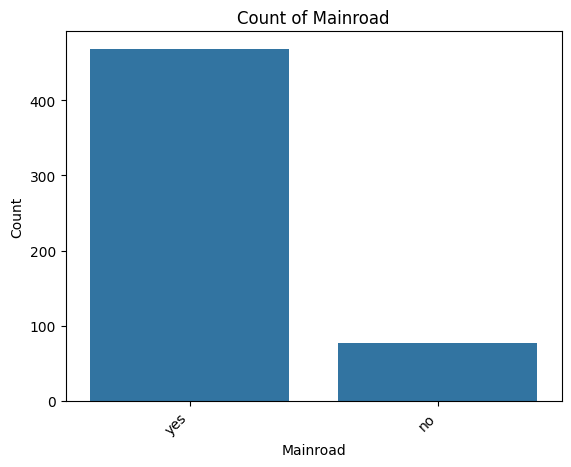

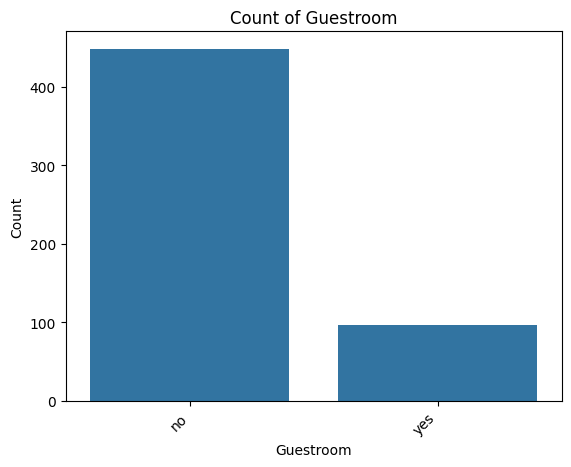

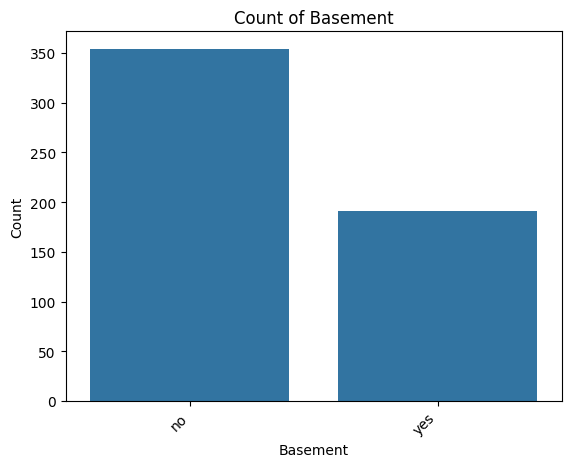

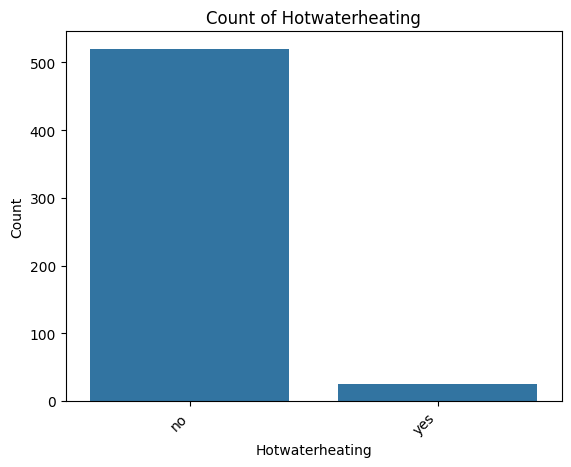

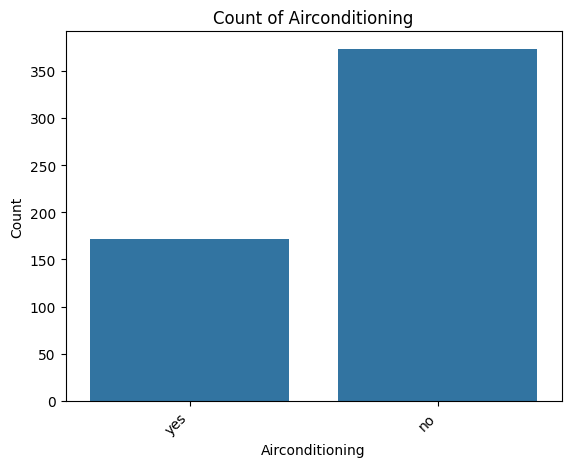

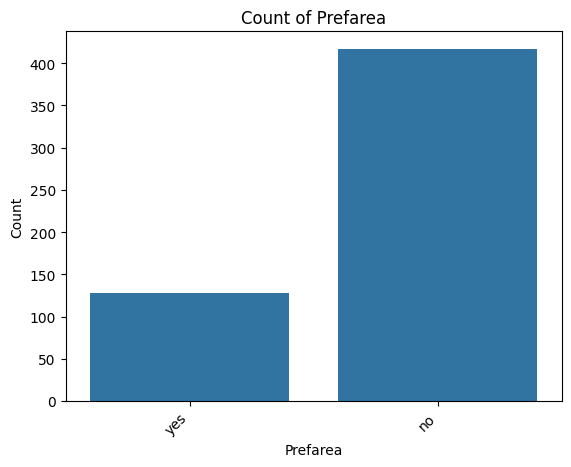

In [16]:
# Count plots for key categorical features
categorical_features = ['furnishingstatus', 'mainroad', 'guestroom', 'basement',
                        'hotwaterheating', 'airconditioning', 'prefarea']

for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.xlabel(feature.capitalize())  # Capitalize feature name for label
    plt.ylabel('Count')
    plt.title(f'Count of {feature.capitalize()}')  # Capitalize title
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

**Pie Charts**

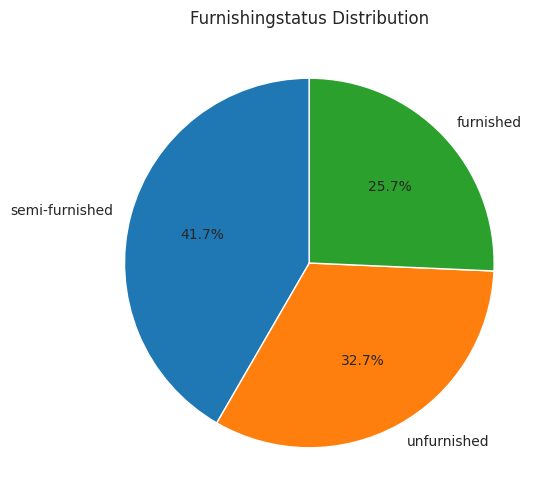

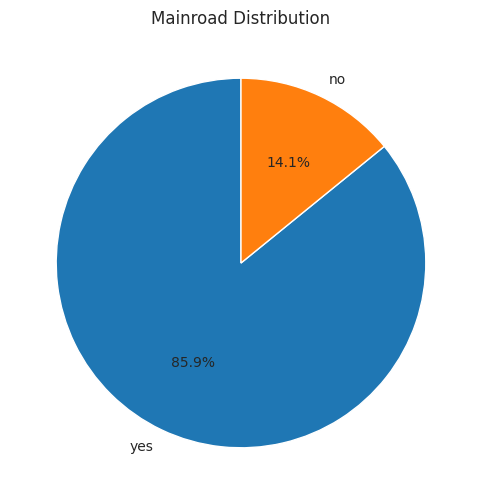

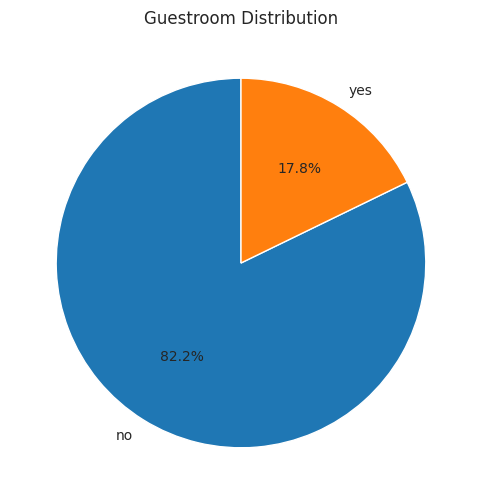

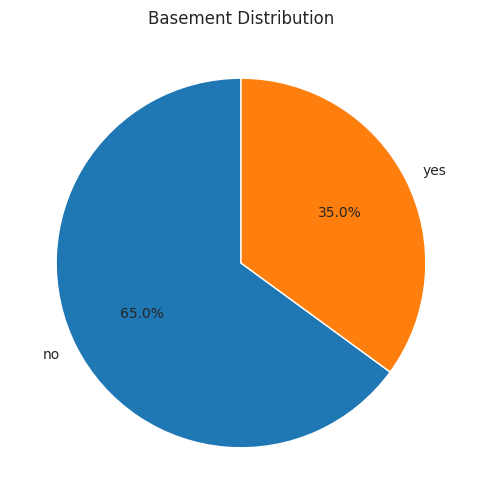

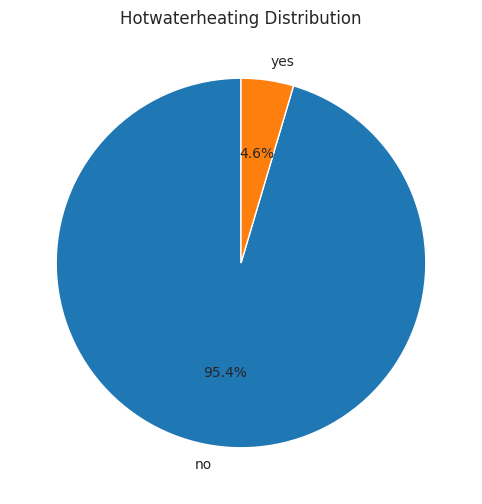

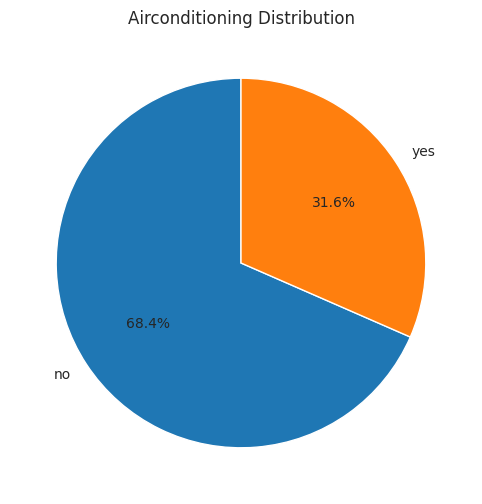

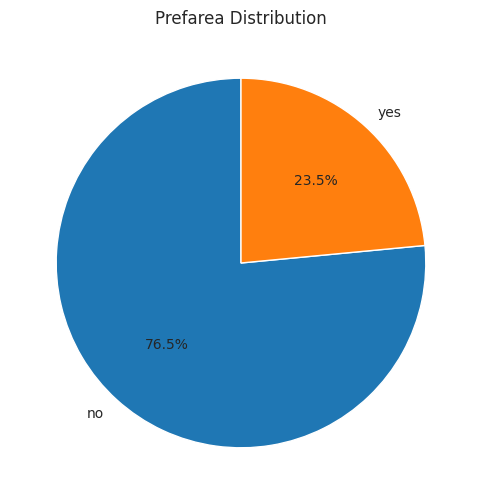

In [17]:
sns.set_style("whitegrid")  # Optional: Set a visually appealing style

# Pie charts for key categorical features
categorical_features = ['furnishingstatus', 'mainroad', 'guestroom', 'basement',
                        'hotwaterheating', 'airconditioning', 'prefarea']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.pie(df[feature].value_counts(), labels=df[feature].value_counts().index,
            autopct='%1.1f%%', startangle=90)
    plt.title(f'{feature.capitalize()} Distribution')  # Capitalize title
    plt.show()

**Data Preprocessing and Feature Engineering**

In [18]:
# Apply MinMaxScaler to numerical features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['area', 'price', 'bedrooms', 'bathrooms']] = scaler.fit_transform(df[['area', 'price', 'bedrooms', 'bathrooms']])

**One Hot Encoding for categorical features**

In [19]:
# Convert Categorical features to numerical using one-hot encoding

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
Y = df['price']

**Model Building and Evaluation**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

In [22]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
375,0.296220,0.4,0.000000,2,0,True,True,True,False,False,False,False,True
187,0.305842,0.4,0.000000,1,0,True,False,True,False,True,True,True,False
109,0.341237,0.6,0.333333,2,1,True,True,False,True,False,False,True,False
454,0.195876,0.4,0.000000,2,0,True,False,False,False,True,False,False,True
382,0.103093,0.4,0.000000,2,0,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.292096,0.6,0.333333,2,1,False,False,True,False,False,False,False,True
393,0.396838,0.4,0.000000,1,0,False,False,False,False,False,False,False,True
75,0.179381,0.6,0.333333,2,0,True,False,False,True,False,False,True,False
337,0.034021,0.6,0.333333,1,0,True,False,True,False,False,True,False,True


**Linear Regression Model**

In [23]:
# Train the Linear Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

**Model Coeffecients**



In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [25]:
print(coeff_df)

                                 Coefficient
area                                0.321864
bedrooms                            0.020850
bathrooms                           0.263448
stories                             0.040354
parking                             0.025370
mainroad_yes                        0.038041
guestroom_yes                       0.012040
basement_yes                        0.038891
hotwaterheating_yes                 0.066026
airconditioning_yes                 0.070226
prefarea_yes                        0.063899
furnishingstatus_semi-furnished     0.002892
furnishingstatus_unfurnished       -0.040640


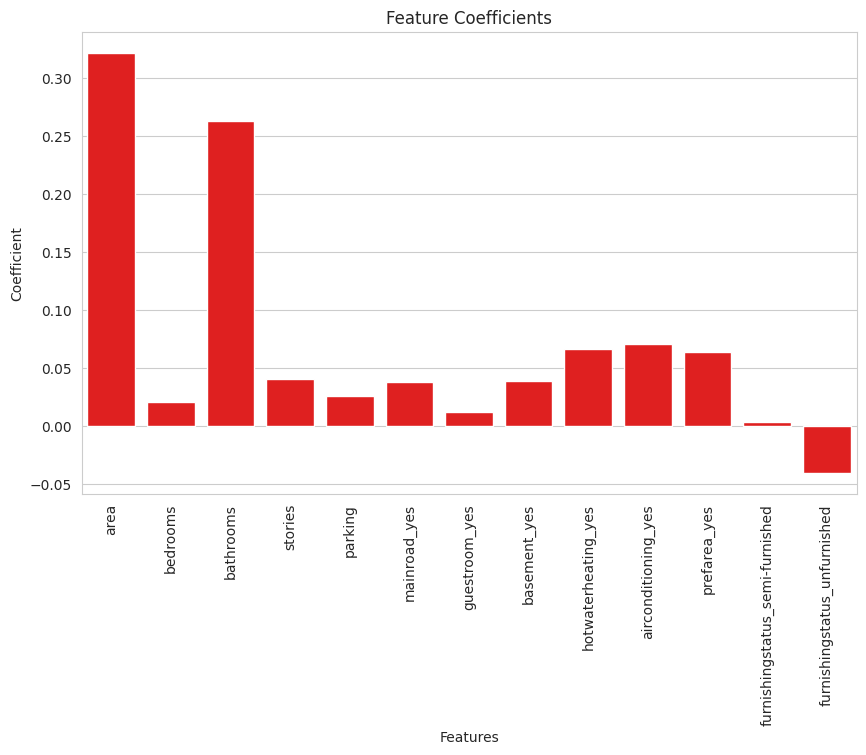

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_df.index, y=coeff_df['Coefficient'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()

**Actual vs Predicted Prices**

In [27]:
predictions = lm.predict(X_test)

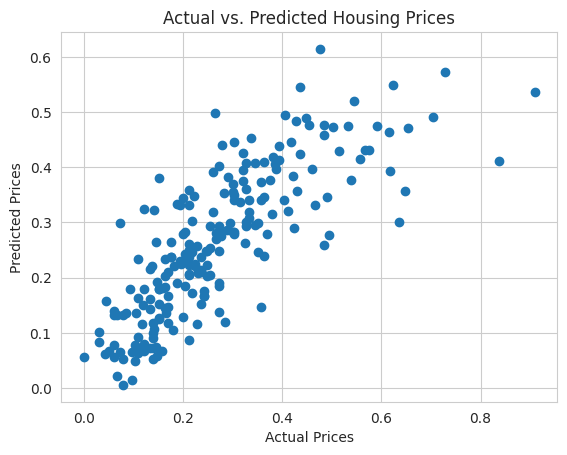

In [28]:
plt.scatter(y_test, predictions)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Housing Prices")

plt.show()

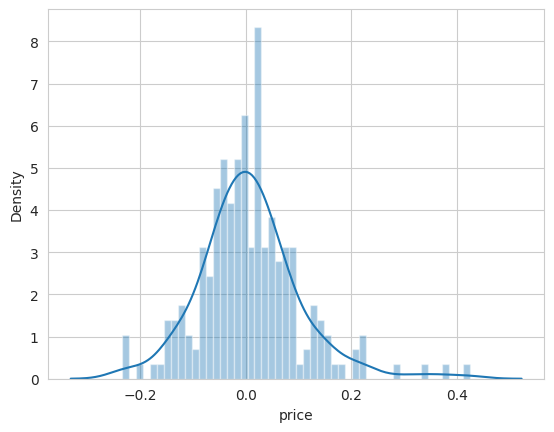

In [29]:
sns.distplot((y_test-predictions),bins=50);

**Residual Plot**

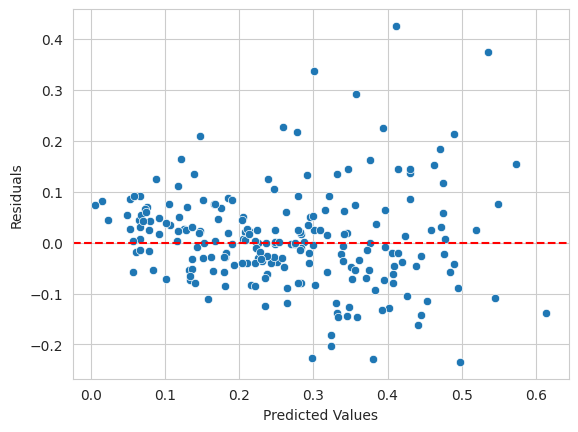

In [30]:
# Residual plot

residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Root Mean Squared Error**

In [31]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.0961571621825269


**R Squared**

In [32]:
# R-squared

from sklearn.metrics import r2_score

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.6267209023959794


**END**